In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importing the churn_raw_data.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [21]:
# select the relevant continuous variables for PCA
continuous_vars = ['MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Tenure']

In [22]:
# select the relevant data
df_continuous = df[continuous_vars]

In [23]:
# standardize the continuous variables
scaler = StandardScaler()
df_continuous_scaled = scaler.fit_transform(df_continuous)

In [24]:
# convert the standardized data back to a dataframe
df_continuous_scaled = pd.DataFrame(df_continuous_scaled, columns=continuous_vars)

In [25]:
# save prepared data to csv
df_continuous_scaled.to_csv('prepared_data_d212_task2.csv', index=False)

In [26]:
# df_continuous_scaled is already standardized and available
pca = PCA()
principal_components = pca.fit_transform(df_continuous_scaled)

# matrix of all principal components
components_matrix = pd.DataFrame(pca.components_, columns=df_continuous_scaled.columns)

# display the components matrix
components_matrix

,MonthlyCharge,Bandwidth_GB_Year,Outage_sec_perweek,Tenure
0,0.040761,0.707163,0.005898,0.705850
1,0.709435,-0.000646,0.703255,-0.046197
2,0.702127,0.005274,-0.710914,-0.039890
3,-0.045358,0.707031,0.000047,-0.705727


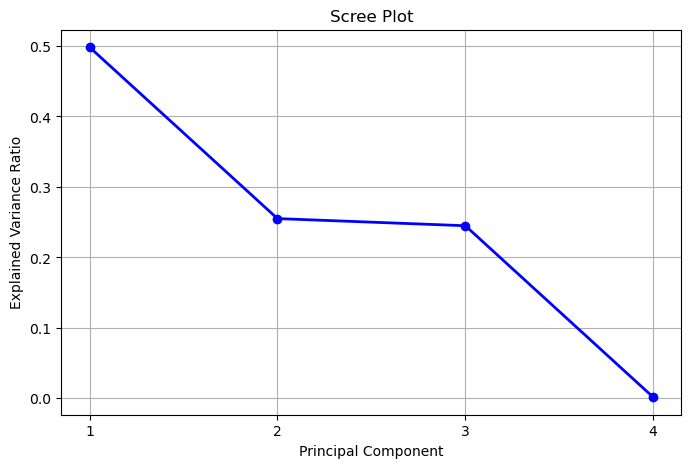

In [27]:
# display scree plot to determine the number of principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

In [28]:
# variance explained by each principal component
explained_variance = pd.Series(pca.explained_variance_ratio_)

# display the explained variance for each principal component
explained_variance

0    0.498293
1    0.255120
2    0.244973
3    0.001615
dtype: float64

In [29]:
# cumulative variance to determine total variance captured by selected components
cumulative_variance = explained_variance.cumsum()

# display cumulative variance
cumulative_variance

0    0.498293
1    0.753413
2    0.998385
3    1.000000
dtype: float64